**Set environment**

In [3]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [8]:
FD_RES

[1] "/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results"

In [9]:
FD_RES_PRE = "/data/reddylab/Kuei/work/proj_encode_fcc/results_v4"

In [10]:
txt_fdiry = FD_RES_PRE
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

A001_K562_WSTARRseq 
comparison 
comparison_archive231029 
CRISPRi_FlowFISH 
CRISPRi_Growth_K562_Gersbach 
hic_intact_K562_deep 
hic_intact_K562_ENCSR479XDG 
KS91_K562_ASTARRseq 
LentiMPRA_K562_Nadav 
region 
Tewhey_K562_TileMPRA 


**STARR/MPRA Ranked score**

In [11]:
txt_fdiry = file.path(FD_RES_PRE, "comparison")
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

result.ranknorm.starrmpra.overlap.tsv 
result.score.starrmpra.tsv 


In [16]:
txt_fdiry = file.path(FD_RES_PRE, "comparison")
txt_fname = "result.ranknorm.starrmpra.overlap.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat = dat %>% dplyr::rename("Region" = "Peak")

dat_region_ranknorm = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 1241    6


Region,ASTARR,WSTARR,TMPRA,LMPRA,Mean
chr11:32870601-32871324,0.1200645,0.0620467,0.1958098,0.2280419,0.1514907
chr11:32874343-32875070,0.1305399,0.2143433,0.3231265,0.0809831,0.1872482
chr11:32884749-32885822,0.0854150,0.2634972,0.5439162,0.7856567,0.4196213


**CRISPRi-HCRFF (Previous)**

In [17]:
ASSAY   = "CRISPRi_FlowFISH"
FOLDER  = "coverage_astarrseq_peak_macs_input"

txt_fdiry = file.path(FD_RES_PRE, ASSAY, FOLDER)
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

Merge_HCRFF_rAVG.log2FC_2.bed.gz 
Merge_HCRFF_rAVG.log2FC_2.filtered.bed.gz 
summary 


In [18]:
ASSAY   = "CRISPRi_FlowFISH"
FOLDER  = "coverage_astarrseq_peak_macs_input"

txt_fdiry = file.path(FD_RES_PRE, ASSAY, FOLDER, "summary")
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

results.score.tsv 
results.summary.Merge.tsv 
results.summary.tsv 


In [24]:
ASSAY   = "CRISPRi_FlowFISH"
FOLDER  = "coverage_astarrseq_peak_macs_input"

txt_fdiry = file.path(FD_RES_PRE, ASSAY, FOLDER, "summary")
txt_fname = "results.summary.Merge.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat = dat %>% dplyr::rename("Region" = "Peak")

dat_region_score_chcrff_import = dat
print(dim(dat))
head(dat)

[1] 1330    6


Region,Mean,Mean_Pos,Mean_Neg,Count,Note
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr11:33065336-33066228,-0.08308383,0.03675483,-0.2734393,138,CAPRIN1:138|CAT:138|LMO2:138
chr11:33068519-33069100,-0.12006903,0.00000000,-0.1593220,159,CAPRIN1:159|CAT:159|LMO2:159
chr11:33072412-33072630,0.10643558,0.35299267,-0.1982723,36,CAPRIN1:36|CAT:36|LMO2:36
chr11:33103533-33104120,0.98158422,1.44209600,0.0000000,9,CAPRIN1:9|CAT:9|LMO2:9
chr11:33114629-33115134,0.22095793,0.42649733,0.0000000,27,CAPRIN1:27|CAT:27|LMO2:27
chr11:33125296-33126416,-0.05128921,0.04323581,-0.1542515,159,CAPRIN1:159|CAT:159|LMO2:159


In [25]:
dat = dat_region_ranknorm
dat = dat %>% 
    #dplyr::select(Chrom, ChromStart, ChromEnd, Region) %>% 
    dplyr::select(Region) %>% 
    dplyr::distinct()

###
dat_region = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 1241    1


Region
chr11:32870601-32871324
chr11:32874343-32875070
chr11:32884749-32885822
chr11:32901572-32902485
chr11:32903491-32904506
chr11:32910855-32912010


In [26]:
#dat = dat_region_score_starrmpra_import
dat = dat_region_ranknorm

dat = dat %>% 
    dplyr::select(Region, Mean) %>% 
    dplyr::distinct() %>%
    dplyr::arrange(Mean)
vec = dat$Region

### assign and show
VEC_TXT_REGION = vec
print(length(vec))

[1] 1241


In [29]:
dat = dat_region_score_chcrff_import
dat = dat %>% dplyr::filter(Count >= 3)

dat = dat %>% 
    dplyr::select(Region, Mean_Pos, Mean_Neg) %>%
    dplyr::right_join(dat_region, by = "Region")

dat = dat %>% 
    tidyr::gather(Group, Score, -Region) %>%
    dplyr::select(Region, Group, Score) %>%
    dplyr::mutate(Region = factor(Region, levels=VEC_TXT_REGION)) %>%
    replace(is.na(.), 0)

dat_region_score_chcrff_arrange = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 2482    3


Region,Group,Score
chr11:33065336-33066228,Mean_Pos,0.0367548
chr11:33068519-33069100,Mean_Pos,0.0000000
chr11:33103533-33104120,Mean_Pos,1.4420960


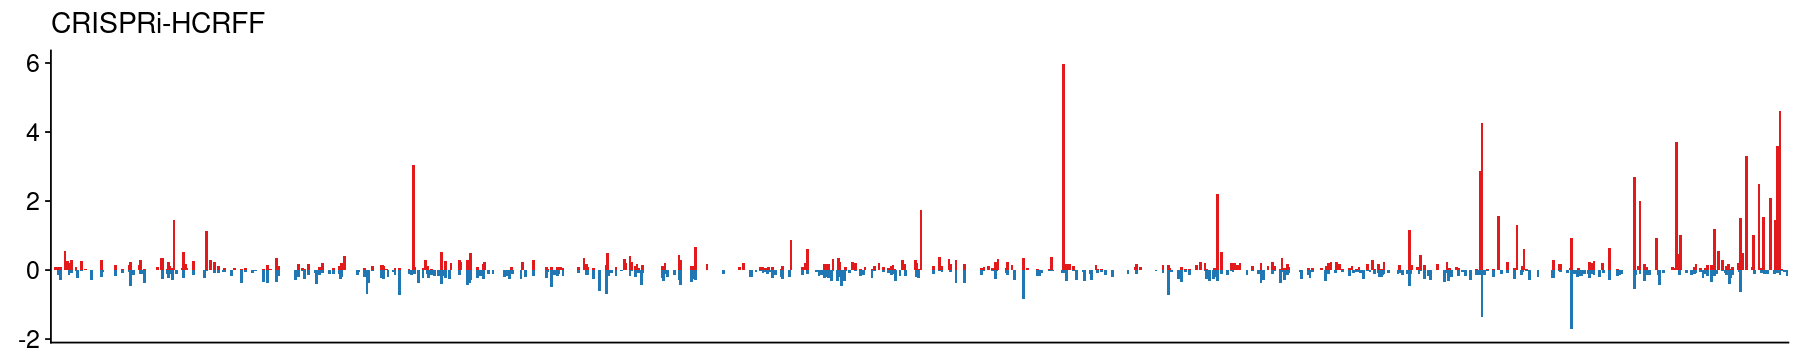

In [30]:
theme_fill = scale_fill_manual(
    values = c(
        "Mean_Pos"="#e31a1c", 
        "Mean_Neg"="#1f78b4")
)

theme_text = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    plot.title = element_text(face = "plain", size = 17)
    #axis.title.y = element_text(size = 15)
)

theme_legend = theme(legend.position = "none")

dat = dat_region_score_chcrff_arrange

gpt = ggplot(dat, aes(x=Region, y=Score, fill=Group)) + 
    geom_col(width=2, position="identity") + 
    labs(title = "CRISPRi-HCRFF") +
    theme_cowplot() + 
    theme_text +
    theme_fill +
    theme_legend

gpt_score_crispri_hcrff = gpt

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)